In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
def load(data): # Loading the data from the excel
    d = pd.read_excel(data)
    df1 = pd.DataFrame(d.iloc[13:21,1:13]) # Specification of the cells that have the values we need; raw data     
    mean = df1.mean(0)
    mean2 = list(map(lambda x: x - mean[-1], mean)) 
    del mean2[-1]
    del mean2[0:3]
    return mean2

In [3]:
gain_reps = 7; conc_range = 8; concentration = []; col = []
arr_ = np.zeros((conc_range, gain_reps))

for j in range(conc_range):
    initial = 10 / 2**3
    concentration_ = initial / 2**(j)
    concentration.append(concentration_)

for i in range(gain_reps):        
    a = 'C:\Clariostar\Writeup data\Clariostar data\Fluorescein 10uM Gain '
    b = '.xlsx'
    gain = 50*i + 200
    c = a + str(gain) + b  
    
    col.append(gain)
    
    data_ = load(c)
    
    for x in range(len(data_)):
        arr_[x, i] = data_[x]


df = pd.DataFrame(arr_, index = concentration, columns = col)
print(df)

               200       250        300        350        400        450  \
1.250000  2462.875  5096.375  10317.375  20435.000  39500.875  72743.125   
0.625000  1278.625  2647.250   5373.000  10686.625  20707.000  38497.875   
0.312500   633.000  1317.750   2666.375   5323.750  10343.500  19318.000   
0.156250   321.500   676.375   1365.250   2722.125   5309.250   9932.750   
0.078125   162.250   337.375    681.125   1354.250   2639.750   4941.625   
0.039062    81.875   169.125    343.250    688.500   1348.250   2512.875   
0.019531    44.500    87.375    173.750    345.750    681.500   1272.375   
0.009766    21.625    43.750     87.375    179.125    345.875    641.875   

                 500  
1.250000  126478.000  
0.625000   67979.625  
0.312500   34345.000  
0.156250   17664.875  
0.078125    8821.625  
0.039062    4492.125  
0.019531    2272.375  
0.009766    1156.000  


0.9996669439787566
0.9997542290483417
0.9997799957259896
0.999766413813083
0.9997929903133225
0.9998008343974571
0.9997473649934973
0.999869838523759


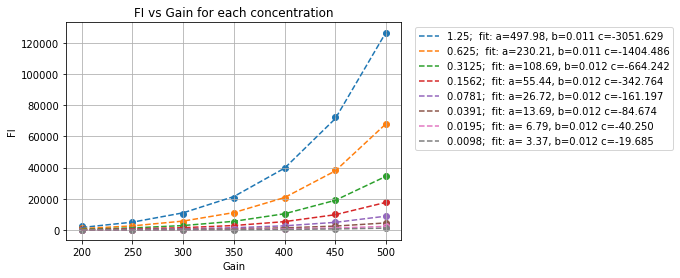

0.011540899049732503


In [4]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c

popt5_alist = []
popt5_blist = []
popt5_clist = []

for i in range(df.shape[0]):
    x1 = df.columns
    y1 = df.iloc[i, :]

    plt.scatter(x1, y1)
    
    
    popt5, pcov5 = curve_fit(func, x1, y1, p0 = [1, 0.006, -50], maxfev = 30000)
#     print(np.round(popt1, 3))
    popt5_alist.append(popt5[0])
    popt5_blist.append(popt5[1])
    popt5_clist.append(popt5[2])
   

    plt.plot(x1, func(x1, *popt5), '--', label = str(round(initial*0.5**i, 4)) + ';  fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt5))

    residuals = y1 - func(x1, *popt5)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y1 - np.mean(y1))**2)
    r_squared = 1 - (ss_res/ss_tot)

    print(r_squared)    

plt.title("FI vs Gain for each concentration")
plt.xlabel('Gain')
plt.ylabel('FI')

plt.grid()
plt.legend(bbox_to_anchor = (1.025, 1), loc = 2)
plt.show()

bmean = np.mean(popt5_blist)
print(bmean)

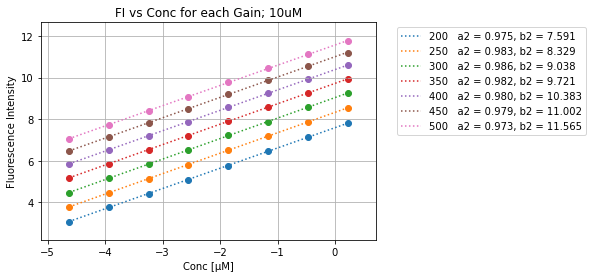

0.9794646387316412


In [6]:
fit2_array = np.zeros((0,2)); a2_list = []; b2_list = []
for i in range(df.shape[1]): 
    x2 = np.log(df.index)
    y2 = np.log(np.array(df.iloc[:, i]))   
    
    fit2 = np.polyfit(x2, y2, 1) # linear regression, generates y=mx+c as log(FI)=(B)Gain+log(a)
    a2 = fit2[0]
    b2 = fit2[1]
    fit2_equation = a2 * x2 + b2
    fit2_list = [fit2]
    
    fit2_array = np.append(fit2_array, fit2_list, axis = 0)
    a2_list.append(a2); b2_list.append(b2)
    
    plt.scatter(x2, y2)
    plt.plot(x2, fit2_equation, ':', label = str(50*i + 200) + '   a2 = %5.3f, b2 = %5.3f' % tuple(fit2))

plt.title('FI vs Conc for each Gain; 10uM'); plt.xlabel('Conc [µM]'); plt.ylabel('Fluorescence Intensity')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2); plt.grid(); plt.margins(0.10) 
plt.show()
# print(fit2_array)

a2_array = np.array(a2_list)
a2_mean = np.mean(a2_array)
print(a2_mean)

374.3939636794427 0.011329918073272296 -2309.822002895055 
 
 0.9997127709451629


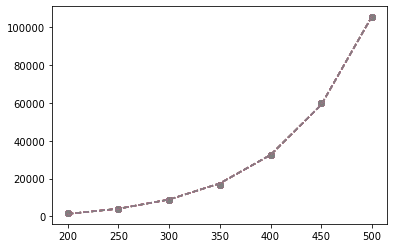

In [7]:
def func(x, a, b, c):
    return a*np.exp(b*x) + c


for i in range(df.shape[0]):
    m = df.columns
    delta = np.exp(b2_list)
    
    popt9, pcov9 = curve_fit(func, m, delta, p0 = [1, 0.006, -50], maxfev = 30000)

    plt.plot(m, func(m, *popt9), '--', label = 'fit: a=%5.2f, b=%5.3f c=%5.3f'% tuple(popt9))
    
    plt.scatter(m, delta)

residuals_test1_1 = delta - func(m, *popt9)
ss_res1_1 = np.sum(residuals_test1_1**2)
ss_tot1_1 = np.sum((delta - np.mean(delta))**2)
r_squared1_1 = 1 - (ss_res1_1 / ss_tot1_1)
print(*popt9, '\n', '\n', r_squared1_1)

                  200          250           300           350           400  \
1.250000  1617.025009  5039.611969  11070.489874  21697.389566  40422.855218   
0.625000   820.103190  2555.929454   5614.597178  11004.219653  20501.174874   
0.312500   415.930018  1296.285392   2847.543499   5580.987049  10397.537951   
0.156250   210.946357   657.434349   1444.182677   2830.497520   5273.297560   
0.078125   106.985222   333.429603    732.443105   1435.537503   2674.447286   
0.039062    54.259471   169.104794    371.471637    728.058551   1356.393832   
0.019531    27.518662    85.764524    188.398492    369.247931    687.919421   
0.009766    13.956582    43.497014     95.549669    187.270700    348.890653   

                   450            500  
1.250000  73418.655880  131559.952954  
0.625000  37235.586034   66722.985978  
0.312500  18884.694233   33839.757144  
0.156250   9577.710848   17162.438803  
0.078125   4857.507564    8704.238166  
0.039062   2463.571944    4414.510252  

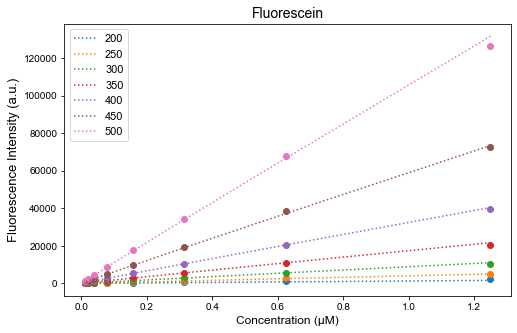

In [9]:
model = list(df.index) # concentrations
model = np.array(model, dtype = float)
model_array = []
index_gain = []

for gn in range(gain_reps): 
    gain = 50*gn + 200
    result = list(map(lambda uM: (popt9[0]*np.exp(popt9[1]*gain)+popt9[2])*uM**(a2_mean), model))
    model_array.append(result)
    index_gain.append(gain)


model_df = pd.DataFrame(model_array, index = index_gain, columns = model)
model_df = model_df.T # transpose df
print(model_df)

plt.figure(figsize=(8,5))

for i in range(df.shape[1]):
    gain = 50*i + 200
  
    x = df.index
    y = df.iloc[:, i]
    
    x_model = model_df.index
    y_model = model_df.iloc[:, i]
    
    plt.scatter(x, y)
    plt.plot(x_model, y_model, ':', label = '%2.0f' % gain)

plt.title('Fluorescein', fontsize=14, fontname='Arial'); plt.xlabel('Concentration (\u03BCM)', fontsize=12, fontname='Arial'); plt.ylabel('Fluorescence Intensity (a.u.)', fontsize=13, fontname='Arial')
plt.grid(False); plt.legend(loc="upper left") 
params = {'legend.fontsize': 11, 'legend.handlelength': 2}; plt.rcParams["font.family"] = "Arial"; plt.rcParams.update(params)
# plt.savefig('Claristar Fluorescein.png', dpi=300)

plt.show()

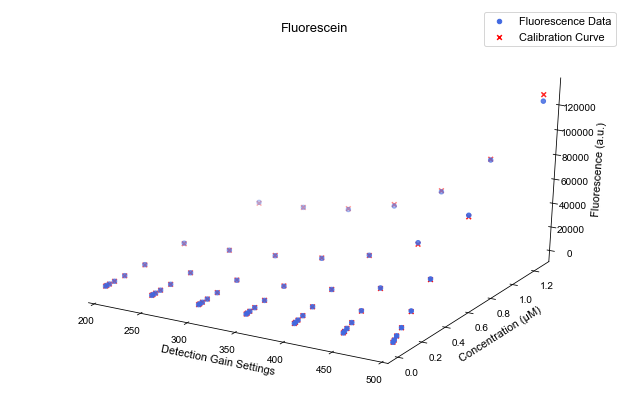

In [31]:
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')

x,y = np.meshgrid(df.columns, df.index)
X,Y = np.meshgrid(model_df.columns, model_df.index)
z1 = np.array(df.values)
z2 = np.array(model_df.values)

ax.scatter3D(x, y, z1, label = 'Fluorescence Data', s=20, c='royalblue', marker='o')
ax.scatter3D(X, Y, z2, label = 'Calibration Curve', s=22, c='r', marker='x')

ax.set_title('Fluorescein', fontname="Arial", fontsize=13)
ax.set_xlabel('Detection Gain Settings', fontname="Arial", fontsize=11)
ax.set_ylabel('Concentration (\u03BCM)', fontname="Arial", fontsize=11)
ax.set_zlabel('Fluorescence (a.u.)', fontname="Arial", fontsize=11)
ax.legend(loc=1)

# plt.rc('grid', linestyle=":", color='grey'); #ax.set_xticklabels(df.columns, fontsize=9.5); 
ax.grid(False)
ax.set_xlim(200,500)

ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w'); ax.yaxis.pane.set_edgecolor('w'); ax.zaxis.pane.set_edgecolor('w')

plt.savefig('Claristar Fluorescein 3D.png', dpi=300)

plt.show()

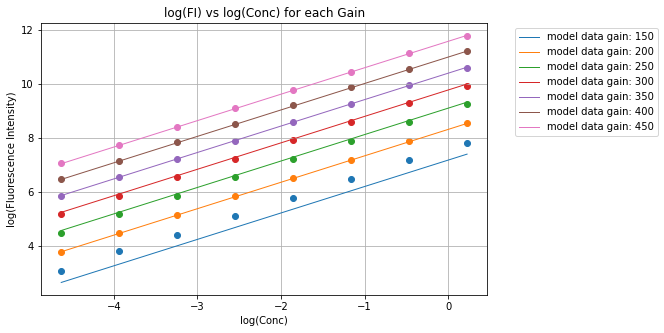

Model dataframe: 
 
                   200          250           300           350           400  \
1.250000  1617.025009  5039.611969  11070.489874  21697.389566  40422.855218   
0.625000   820.103190  2555.929454   5614.597178  11004.219653  20501.174874   
0.312500   415.930018  1296.285392   2847.543499   5580.987049  10397.537951   
0.156250   210.946357   657.434349   1444.182677   2830.497520   5273.297560   
0.078125   106.985222   333.429603    732.443105   1435.537503   2674.447286   
0.039062    54.259471   169.104794    371.471637    728.058551   1356.393832   
0.019531    27.518662    85.764524    188.398492    369.247931    687.919421   
0.009766    13.956582    43.497014     95.549669    187.270700    348.890653   

                   450            500  
1.250000  73418.655880  131559.952954  
0.625000  37235.586034   66722.985978  
0.312500  18884.694233   33839.757144  
0.156250   9577.710848   17162.438803  
0.078125   4857.507564    8704.238166  
0.039062   2463.57

In [13]:
plt.figure(figsize=(8,5))
for i in range(df.shape[1]):
    gain = 50*i + 150
    
    x = np.log(df.index)
    y = np.log(df.iloc[:, i])
    
    x_model = np.log(model_df.index)
    y_model = np.log(model_df.iloc[:, i])


    
    plt.scatter(x, y)
#     plt.plot(np.log(x), np.log(y), ':', c = 'skyblue', label = 'real data gain: %2.0f' % gain)
    
#     plt.scatter(np.log(x_model), np.log(y_model), c = 'sienna')
    plt.plot(x_model, y_model, linewidth = 1, label = 'model data gain: %2.0f' % gain)


plt.title('log(FI) vs log(Conc) for each Gain')
plt.xlabel('log(Conc)')
plt.ylabel('log(Fluorescence Intensity)')
plt.legend(bbox_to_anchor = (1.05, 1))
plt.grid()
    
plt.show()
print('Model dataframe:', "\n", "\n", model_df)